In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# Data
 - We have datasets in 2019, 2020, 2021 of these countries:
     * Finland
     * France
     * Spain
     * Germany
     * Netherlands
     * Serbia

In [2]:
def read_data(country,years):
    dfs = pd.DataFrame()
    for year in years:
        path = './data/'+ str.capitalize(country) + '_'+ str(year) + '.csv'
        df = pd.read_csv(path, na_values =["n/e",""])
        dfs = pd.concat([dfs, df])
    return dfs

In [3]:
def organize(df):
    df.columns = df.columns.str.replace(r'  - Actual Aggregated \[MW\]', '', regex=True)
    
    df['Hydro Pumped Storage  - Actual Consumption [MW]'] = -df['Hydro Pumped Storage  - Actual Consumption [MW]']
    df.fillna(0, inplace = True)
    df['Total'] = df.iloc[:,2:].sum(axis=1)
    df[['StartTime', 'EndTime']] = df['MTU'].apply(lambda x: pd.Series(extract_time(x)))
    df.index = pd.to_datetime(df['StartTime'])
    df = df[~df.index.duplicated(keep='first')]
    df = df[df['Total'] > 0]
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

In [4]:
def extract_time(MTU):
    pattern = r'(\d{2}.\d{2}.\d{4} \d{2}:\d{2}) - (\d{2}.\d{2}.\d{4} \d{2}:\d{2})'

    # Use regex to extract the start and end timestamps
    match = re.search(pattern, MTU)
    if match:
        start_time_str, end_time_str = match.groups()

        # Convert timestamps to datetime objects without a specific time zone
        start_time = datetime.strptime(start_time_str, '%d.%m.%Y %H:%M')
        end_time = datetime.strptime(end_time_str, '%d.%m.%Y %H:%M')

        return [start_time,end_time]
        #print("End Time:", end_time)
    else:
        return 'NaN'

In [5]:
resource_categories = ['Hydro Pumped Storage  - Actual Consumption [MW]', 'Biomass', 'Fossil Brown coal/Lignite', 'Fossil Coal-derived gas', 'Fossil Gas', 'Fossil Hard coal', 'Fossil Oil', 'Fossil Oil shale',
       'Fossil Peat', 'Geothermal', 'Hydro Pumped Storage',       
       'Hydro Run-of-river and poundage', 'Hydro Water Reservoir', 'Marine',
       'Nuclear', 'Other', 'Other renewable', 'Solar', 'Waste',
       'Wind Offshore', 'Wind Onshore']

In [6]:
spain = organize(read_data('Spain',[2019,2020,2021]))

In [7]:
spain.index

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               ...
               '2021-12-31 14:00:00', '2021-12-31 15:00:00',
               '2021-12-31 16:00:00', '2021-12-31 17:00:00',
               '2021-12-31 18:00:00', '2021-12-31 19:00:00',
               '2021-12-31 20:00:00', '2021-12-31 21:00:00',
               '2021-12-31 22:00:00', '2021-12-31 23:00:00'],
              dtype='datetime64[ns]', name='StartTime', length=26295, freq=None)

In [8]:
spain[spain['Hydro Pumped Storage  - Actual Consumption [MW]']<-4000][['Hydro Pumped Storage  - Actual Consumption [MW]','Total']]

,Hydro Pumped Storage - Actual Consumption [MW],Total
StartTime,,
2019-02-10 03:00:00,-4005.0,22222.0
2020-02-10 03:00:00,-4004.0,22255.0
2020-02-10 04:00:00,-4020.0,22482.0
2020-02-16 15:00:00,-4029.0,25188.0
2020-02-16 16:00:00,-4221.0,23703.0
2020-03-01 04:00:00,-4100.0,21182.0
2020-03-15 13:00:00,-4116.0,26965.0
2020-03-15 14:00:00,-4157.0,26753.0
2020-03-15 15:00:00,-4471.0,24722.0


In [9]:
spain[spain['Total']<12000][['Total']]

,Total
StartTime,
2019-02-05 19:00:00,10439.0


In [10]:
spain[spain.index=='2019-02-05 19:00:00'].values

array([['BZN|ES', '05.02.2019 19:00 - 05.02.2019 20:00 (CET/CEST)', 0.0,
        0.0, 0.0, 10439.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10439.0,
        Timestamp('2019-02-05 19:00:00'),
        Timestamp('2019-02-05 20:00:00'), 19, 1, 1, 2, 2019, 36, 5, 6]],
      dtype=object)

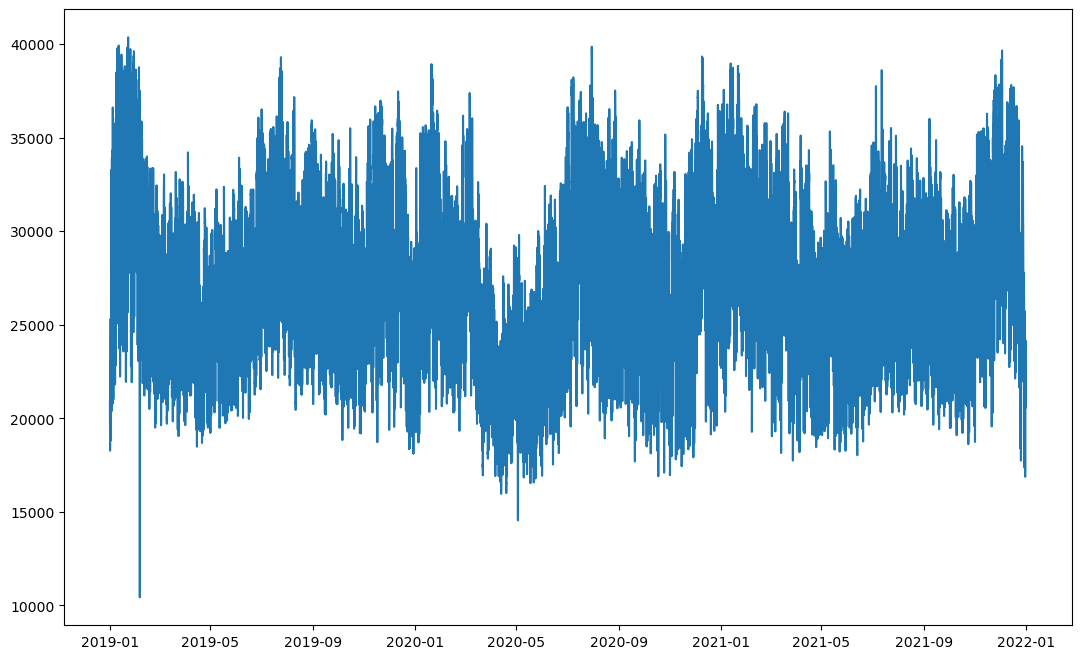

In [11]:
plt.subplots(figsize=(13, 8))
plt.plot(spain.index, spain['Total'])
plt.show()

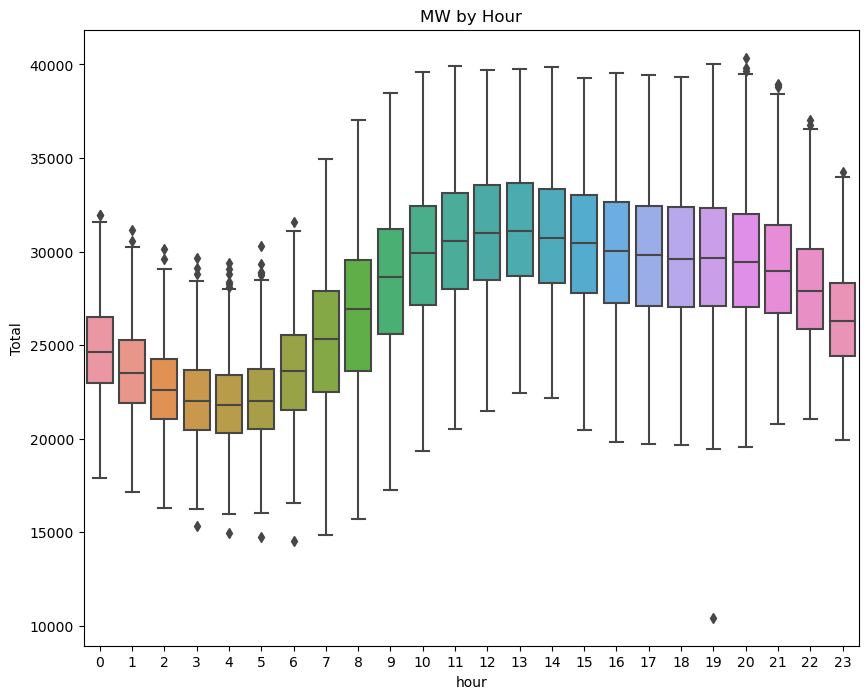

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=spain, x='hour', y='Total')
ax.set_title('MW by Hour')
plt.show()

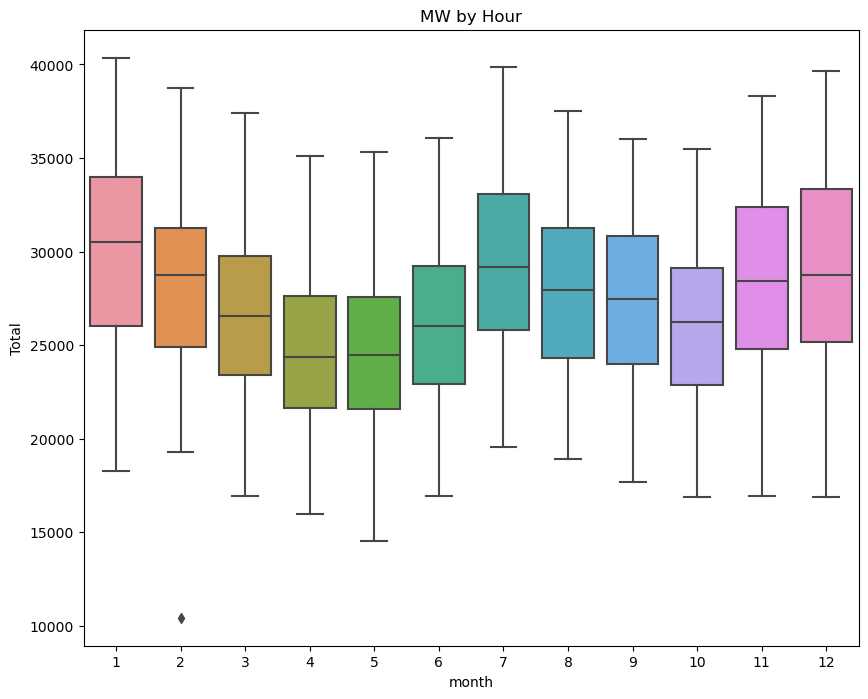

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=spain, x='month', y='Total')
ax.set_title('MW by Hour')
plt.show()

In [14]:
france = organize(read_data('France',[2019,2020,2021]))


In [15]:
france.head()

,Area,MTU,Biomass,Fossil Brown coal/Lignite,Fossil Coal-derived gas,Fossil Gas,Fossil Hard coal,Fossil Oil,Fossil Oil shale,Fossil Peat,...,StartTime,EndTime,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
StartTime,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,BZN|FR,01.01.2019 00:00 - 01.01.2019 01:00 (CET/CEST),351.0,0.0,0.0,2722.0,0.0,207.0,0.0,0.0,...,2019-01-01 00:00:00,2019-01-01 01:00:00,0,1,1,1,2019,1,1,1
2019-01-01 01:00:00,BZN|FR,01.01.2019 01:00 - 01.01.2019 02:00 (CET/CEST),352.0,0.0,0.0,2526.0,0.0,215.0,0.0,0.0,...,2019-01-01 01:00:00,2019-01-01 02:00:00,1,1,1,1,2019,1,1,1
2019-01-01 02:00:00,BZN|FR,01.01.2019 02:00 - 01.01.2019 03:00 (CET/CEST),352.0,0.0,0.0,2425.0,0.0,214.0,0.0,0.0,...,2019-01-01 02:00:00,2019-01-01 03:00:00,2,1,1,1,2019,1,1,1
2019-01-01 03:00:00,BZN|FR,01.01.2019 03:00 - 01.01.2019 04:00 (CET/CEST),351.0,0.0,0.0,2435.0,0.0,215.0,0.0,0.0,...,2019-01-01 03:00:00,2019-01-01 04:00:00,3,1,1,1,2019,1,1,1
2019-01-01 04:00:00,BZN|FR,01.01.2019 04:00 - 01.01.2019 05:00 (CET/CEST),353.0,0.0,0.0,2440.0,0.0,215.0,0.0,0.0,...,2019-01-01 04:00:00,2019-01-01 05:00:00,4,1,1,1,2019,1,1,1


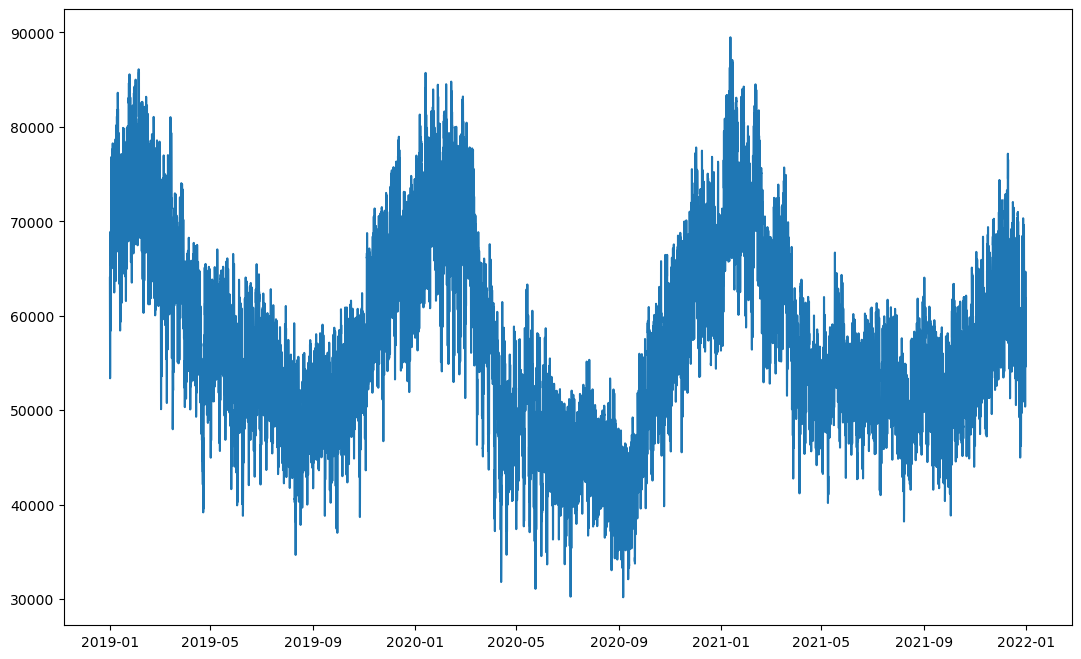

In [16]:
plt.subplots(figsize=(13, 8))
plt.plot(france.index, france['Total'])
plt.show()

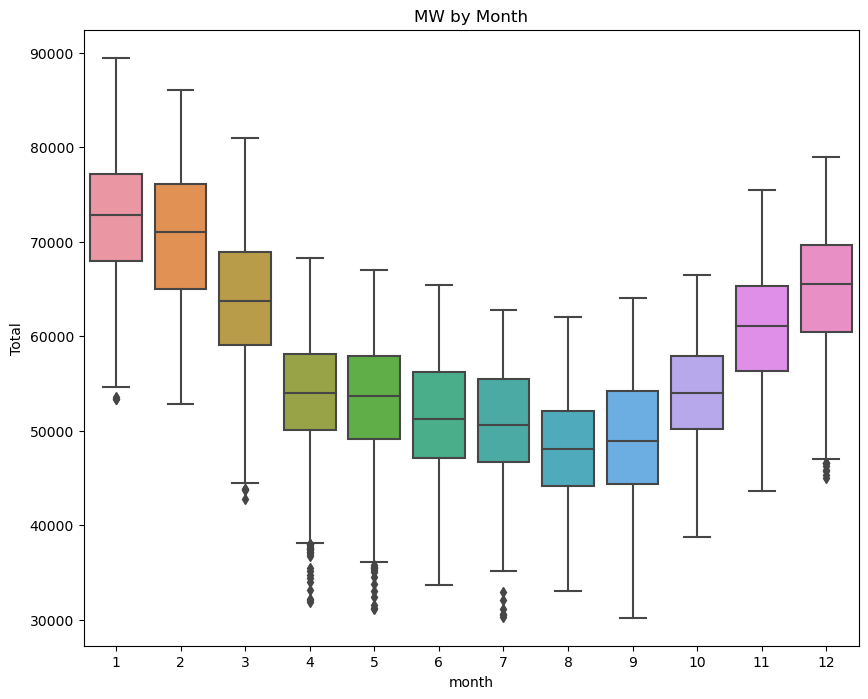

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=france, x='month', y='Total')
ax.set_title('MW by Month')
plt.show()

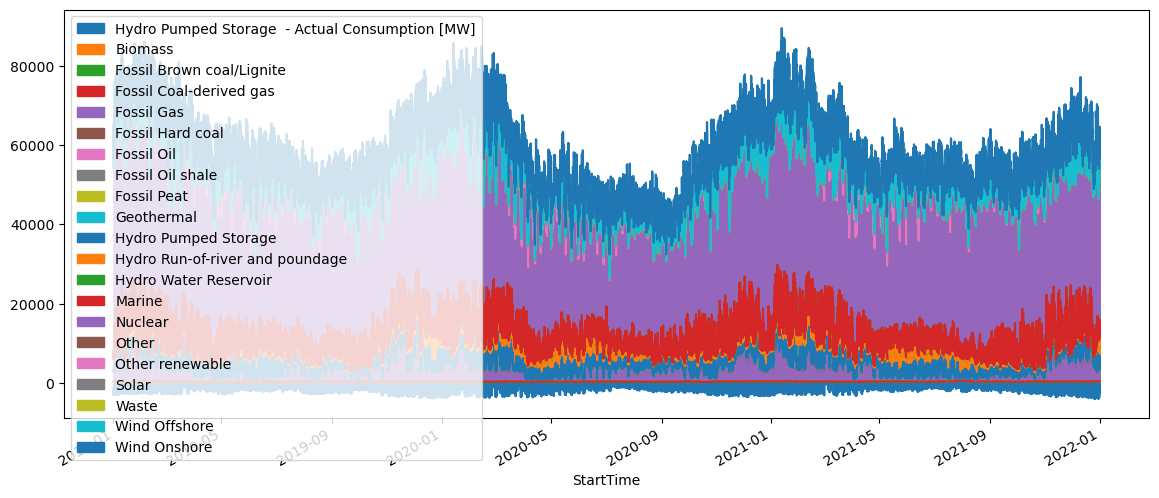

In [26]:
# df = pd.DataFrame({
#      'sales': [3, 2, 3, 9, 10, 6],
#     'signups': [5, 5, 6, 12, 14, 13],
#      'visits': [20, 42, 28, 62, 81, 50],
#  }, index=pd.date_range(start='2018/01/01', end='2018/07/01',
#                         freq='M'))
ax = france.plot.area(y=resource_categories, figsize=(14, 6), stacked=True)


In [35]:
aa = france[resource_categories].resample('2D').mean()

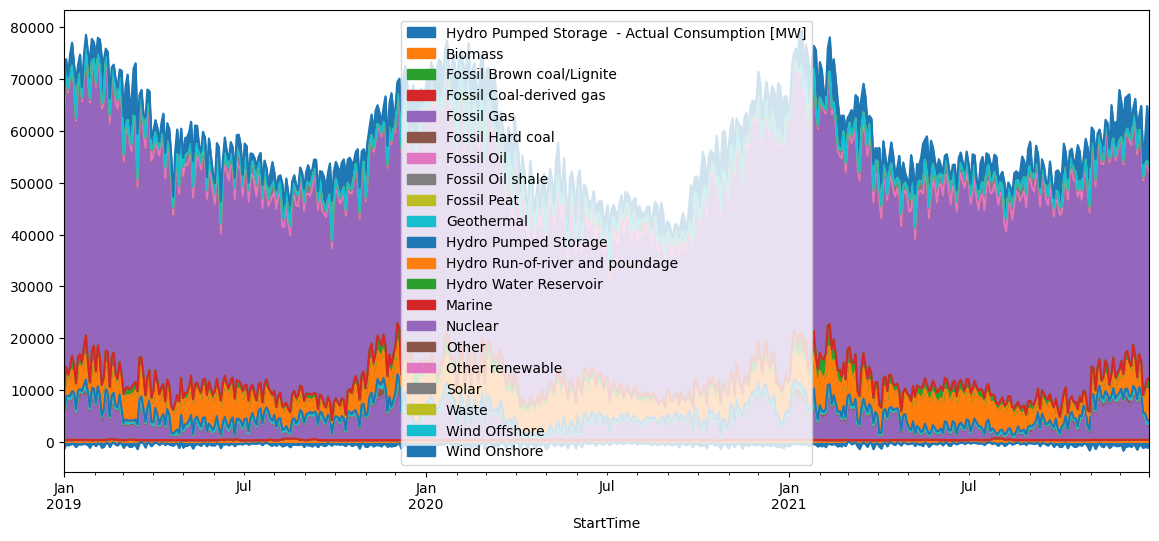

In [36]:
ax = aa.plot.area(y=resource_categories, figsize=(14, 6), stacked=True)
